<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contexto:-Insights" data-toc-modified-id="Contexto:-Insights-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contexto: Insights</a></span></li><li><span><a href="#Lendo-Base" data-toc-modified-id="Lendo-Base-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lendo Base</a></span></li><li><span><a href="#EDA:-Plotagens-Gráficas" data-toc-modified-id="EDA:-Plotagens-Gráficas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA: Plotagens Gráficas</a></span><ul class="toc-item"><li><span><a href="#Donut-e-Pie-Chart" data-toc-modified-id="Donut-e-Pie-Chart-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Donut e Pie Chart</a></span></li><li><span><a href="#Countplot" data-toc-modified-id="Countplot-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Countplot</a></span></li><li><span><a href="#Countplot-em-Barras-Agrupadas" data-toc-modified-id="Countplot-em-Barras-Agrupadas-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Countplot em Barras Agrupadas</a></span></li></ul></li></ul></div>

<a href="https://pypi.org/project/pycomp/#description"><img src="https://i.imgur.com/WcAaq1P.png" alt="pycomp Logo"></a>

Este notebook tem por objetivo apresentar as funcionalidades do pacote **_pycomp_** como uma forma direta de explorar e retirar insights de bases de dados. Disponível no [PyPi](https://pypi.org/project/pycomp/) e no [GitHub](https://github.com/ThiagoPanini/pycomp), o pacote proporciona, a partir de seu módulo `viz`, o encapsulamento de códigos para plotagens gráficas customizadas capazes de proporcionar um rico processo de EDA ao desenvolvedor/cientista atuante.

- _Pré requisitos: conhecimento básico em Python e uma base de dados em mãos!_

    O resto, deixa que o pycomp faz!

# Contexto: Insights

Em uma visão geral, é comum, em tarefas envolvendo a construção de modelos de Machine Learning, aplicar um passo anterior conhecido como EDA (Exploratory Data Analysis). Tal passo é responsável por estreitar as relações entre o cientista e a base de dados que se tem em mão para a dada tarefa. Nele, diversos métodos são aplicados para extrair informações e insights relevantes da base antes da aplicação direta de um modelo preditivo. 

As principais bibliotecas utilizadas nessa etapa exploratória são pandas, numpy, matplotlib, seaborn ou qualquer outra biblioteca gráfica disponível em Python. Nesse contexto, será apresentado o módulo `pycomp.viz.insights` como uma excelente ferramenta para a aplicação do processo exploratório em bases. Através de seus métodos de plotagem, será possível retirar ricos insights de bases com poucas linhas de código, facilitando assim o ganho de conhecimento da base e o subsequente treinamento de um modelo preditivo.

Como exemplo, será utilizada a base de dados [Titanic](https://www.kaggle.com/c/titanic): um problema de negócio clássico que envolve o treinamento de modelos de Machine Learning para o entendimento das principais características relacionadas a sobrevivência dos passageiros e tripulantes no naufrágio do icônico navio.

In [1]:
# Importando bibliotecas
import os
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Definindo variáveis do projeto
DATA_PATH = '../ml/titanic_data/'
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

# Lendo Base

In [3]:
# Lendo base de treino e verificando conteúdo
df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILENAME))
print(f'Dimensões da base de treino: {df.shape}')
df.head()

Dimensões da base de treino: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Uma vez lida a base de treino, é possível analisar os atributos contidos na mesma a partir de seus [metadados](https://www.kaggle.com/c/titanic/data):

- **_PassengerId_:** id do passageiro ou tripulante do navio;
- **_Survived_:** variável resposta indicando a sobrevivência do passageiro ou tripulante;
- **_Pclass_:** categoria indicativa da classe do ticket do passageiro (1=alta, 2=média ou 3=baixa);
- **_Name_:** nome do passageiro ou tripulante;
- **_Sex_:** gênero do passageiro ou tripulante;
- **_Age_:** idade do passageiro ou tripulante;
- **_SibSp_:** quantidade de irmãos ou cônjuges presentes na embarcação;
- **_Parch_:** quantidade de pais ou filhos presentes na embarcação;
- **_Ticket_:** número referente ao ticket do passageiro ou tripulante;
- **_Fare_:** valor da tarifa paga pelo passageiro ou tripulante;
- **_Cabin_:** número da cabine do passageiro ou tripulante;
- **_Embarked_:** porto de embarque do passageiro ou tripulante (C=Cherbourg, Q=Queenstown, S=Southampton).

# EDA: Plotagens Gráficas

Como mencionado na introdução deste notebook, o módulo `pycomp.viz.insights` traz consigo uma série de funções encapsuladas para a plotagem e customização de gráficos em Python, permitindo assim um vasto leque de possibilidades de avaliação e extração de insights de bases de dados lidas. As sessões a seguir serão divididas por tipo de gráfico, trazendo em cada tópico, gráficos customizados para a referida base de dados.

In [4]:
!pip uninstall pycomp -y

Found existing installation: pycomp 0.1.0
Uninstalling pycomp-0.1.0:
  Successfully uninstalled pycomp-0.1.0


In [5]:
!pip install '../../dist/pycomp-0.1.0-py3-none-any.whl'

Processing /home/paninit/workspaces/pycomp/dist/pycomp-0.1.0-py3-none-any.whl


In [6]:
# Importando todas as funções do módulo
from pycomp.viz.insights import *

## Donut e Pie Chart

O primeiro combo de gráficos a ser mencionado neste guia de utilização do módulo `insights` traz representações atreladas a gráficos de rosca e de pizza. Considerando o efeito visual de ambos, tais gráficos são muito utilizados em comparações categóricas de colunas com um número limitado de entradas, permitindo uma análise de volumetrias e de representatividade dessas diferentes entradas frente ao todo.

Nos exemplos abaixo, serão propostas plotagens personalizadas envolvendo gráficos de rosca e de pizza a partir de funções prontas desenvolvidas no módulo `insights`.

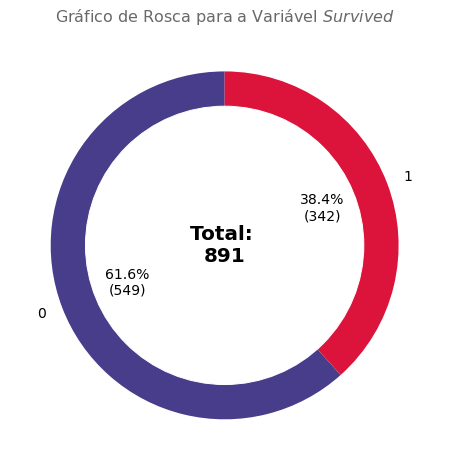

In [7]:
# Analisando volumetrias da variável Survived
plot_donut_chart(df=df, col='Survived')

O gráfico acima traz uma visão de volumetrias da variável `Survived` (sobrevivência ou não dos passageiros do Titanic). Nele, é possível notar que o maior número de entradas da base referem-se a `Survived=0` (549 ou 61.6%). É esperado que o cientista desenvolvedor saiba exatamente o significado de `Survived=0` como sendo o de vítimas do naufrágico do navio, Entretanto, visando proporcionar uma maior facilidade no entendimento desse tipo de análise à todos os consumidores deste notebook, as funções do módulo `insights` trazem consigo uma série de argumentos adicionais para uma completa customização dos gráficos. Ainda relacionado a plotagem acima, é possível notar:

- Rótulos não explicativos (0 e 1);
- Título genérico;
- Cores não representativas ou não intuitivas (azul para "vítima" e vermelho para "sobreviventes");

Visando endereçar todos os tópicos acima citados, a plotagem será refeita considerando customizações adicionais.

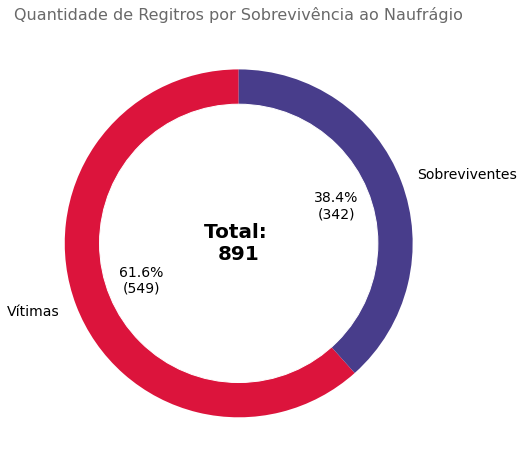

In [8]:
# Customizando gráfico de roscas com **kwargs
plot_donut_chart(df=df, col='Survived', label_names={0: 'Vítimas', 1: 'Sobreviventes'}, 
                 colors=['crimson', 'darkslateblue'], title='Quantidade de Regitros por Sobrevivência ao Naufrágio')

Ótimo! A partir dos parâmetros adicionais da função, foi possível atender as necessidades previamente mencionadas para transformar o gráfico inicial em algo mais explicativo e intuitivo para o consumidor final. Mantendo a mesma análise de sobrevivência, o módulo `insights` permite a plotagem de gráficos customizados de pizza. Dessa forma, a visão análoga pode ser dada por:

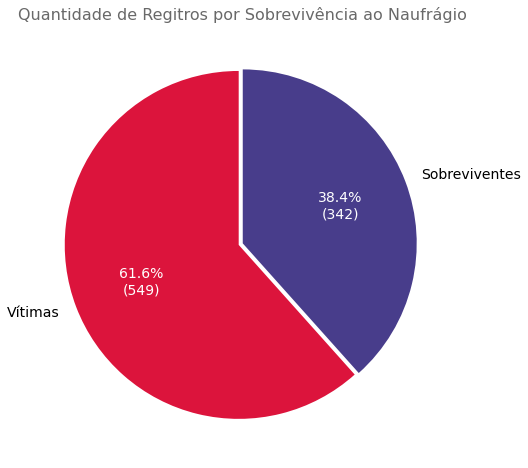

In [9]:
# Plotando gráfico de pizza para analisar volumetrias relacionadas a sobrevivencia
plot_pie_chart(df=df, col='Survived', label_names={0: 'Vítimas', 1: 'Sobreviventes'}, 
               colors=['crimson', 'darkslateblue'], explode=(0.025, 0), shadow=False,
               title='Quantidade de Regitros por Sobrevivência ao Naufrágio')

Os gráficos de pizza e de rosca entregues pelo módulo `insights` respondem perguntas atreladas a **volumetrias** das bases. Em outras palavras, utilizando tais funções é possível responder, por exemplo, "qual a quantidade de linhas da base quebradas pela coluna _X_?"

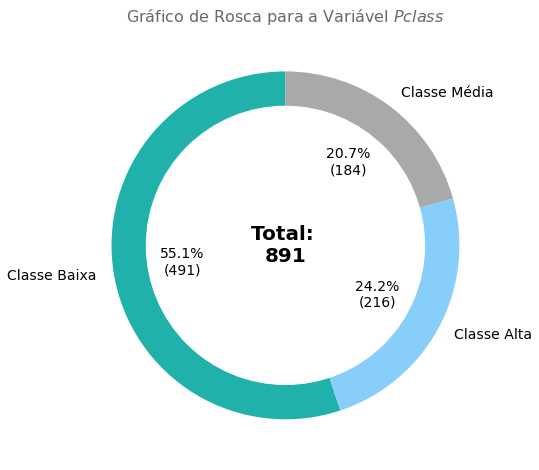

In [10]:
# Anaĺise de volumetria por classe social
plot_donut_chart(df=df, col='Pclass', colors=['lightseagreen', 'lightskyblue', 'darkgrey'],
                 label_names={1:'Classe Alta', 2:'Classe Média', 3:'Classe Baixa'})

Por fim, uma plotagem gráfica adicional criada como uma forma de analisar volumetrias de duas colunas diferentes é a `Double Donut Chart`. Com ela, é possível visualizar, em um gráfico de rosca, volumetrias atreladas a duas colunas categóricas relacionadas.

No gráfico abaixo, serão analisadas as volumetrias de sobreviventes por gênero.

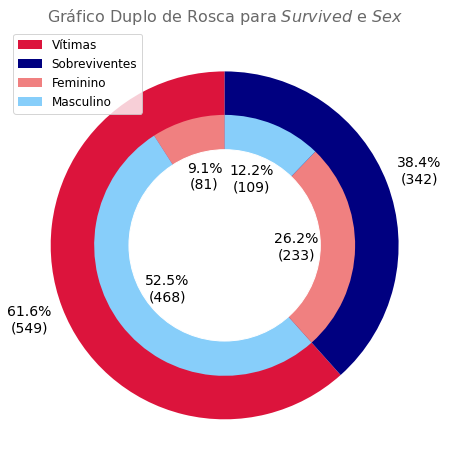

In [11]:
# Analisando volumetrias
plot_double_donut_chart(df=df, col1='Survived', col2='Sex', label_names_col1={0: 'Vítimas', 1:'Sobreviventes'}, 
                        label_names_col2={'male': 'Masculino', 'female':'Feminino'}, 
                        colors1=['crimson', 'navy'], colors2=['lightcoral', 'lightskyblue'])

Em um formato dinâmico, o gráfico acima permite concluir, por exemplo, que 468 das vítimas do naufrágio eram do gênero masculino (52,5% do total). Por outro lado, 233 dos 342 dos sobreviventes eram do gênero feminino. Os números indicam uma preferência de resgate à mulheres durante o naufrágio do navio.

## Countplot

Como uma forma alternativa de analisar volumetrias dentro do processo de exploração de uma base de dados, existe a possibilidade de plotagem de gráficos de barras para diferentes entradas categóricas. Na prática, as representações de volumetrias se assemelham ao mostrado na sessão _3.1 Donut Chart e Pie Chart_, com a diferença de que as entradas estão dispostas em barras verticais ou horizontais.

Para consolidar essa análise de volumetrias, a função `plot_countplot()` traz uma série de argumentos adicionais que podem ser utilizados para customizar o gráfico de acordo com o objetivo final do estudo.

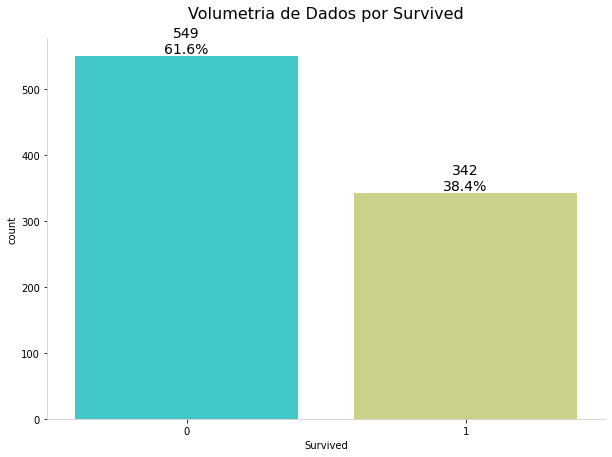

In [12]:
# Plotando volumetrias por sobrevivência
plot_countplot(df=df, col='Survived')

O gráfico de barras acima é análogo ao primeiro gráfico de rosca utilizado nessa demonstração. O objetivo é visualizar a quantidade de sobreviventes e vítimas do naufrágio do navio Titanic a partir da coluna `Survived` presente na base.

Uma das grandes funcionalidades do pacote `pycomp` é disponibilizar diversas ferramentas para que o usuário final possa escolhar a que mais se enquadra dentro de seu respectivo projeto.

Ainda nessa visão, a função `plot_countplot()` permite uma série de configurações adicionais para customização do gráfico gerado. A seguir, a mesma análise de volumetria por sobrevivência será realizada, porém adicionando alguns parâmetros personalizados para a função.

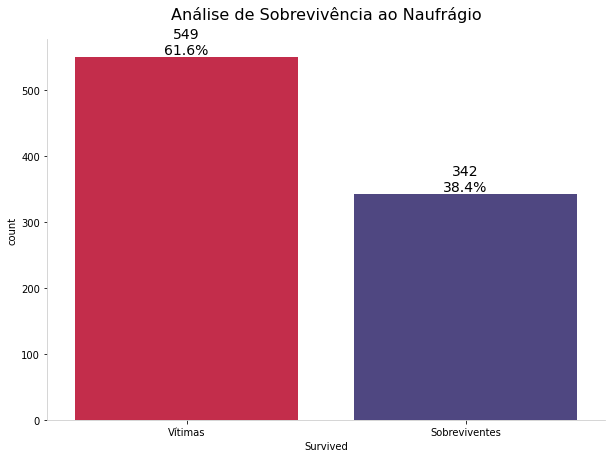

In [13]:
# Personalizando análise de sobrevivência
plot_countplot(df=df, col='Survived', palette=['crimson', 'darkslateblue'], 
               label_names=['Vítimas', 'Sobreviventes'], title='Análise de Sobrevivência ao Naufrágio')

Simulando uma análise análoga a volumetria de dados por classe social (sessão 3.1 acima), é possível plotar o seguinte gráfico de contagem:

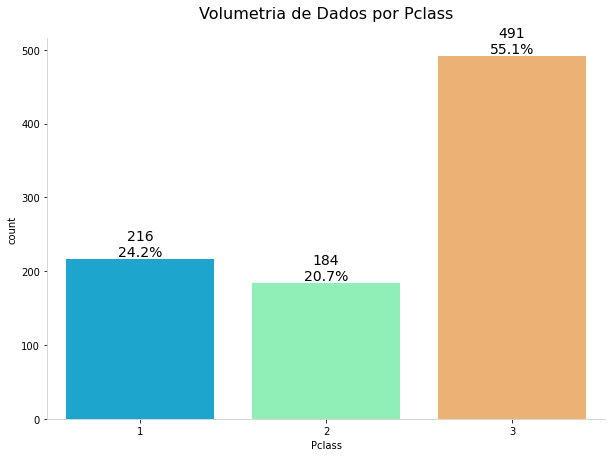

In [14]:
# Volumetria de dados por classe social (Pclass)
plot_countplot(df=df, col='Pclass')

Com o parâmetro `order`, é possível definir uma ordenação no gráfico a partir das volumetrias:

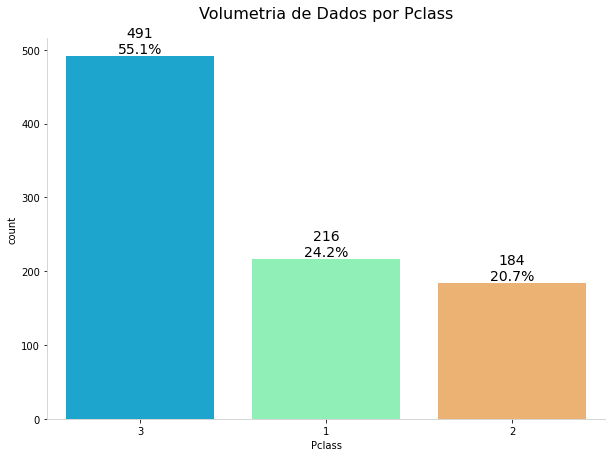

In [15]:
# Ordenando gráfico
plot_countplot(df=df, col='Pclass', order=True)

Como visto no exemplo de volumetria por sobrevivência, o parâmetro `label_names` permite a customização dos rótulos de eixo do gráfico:

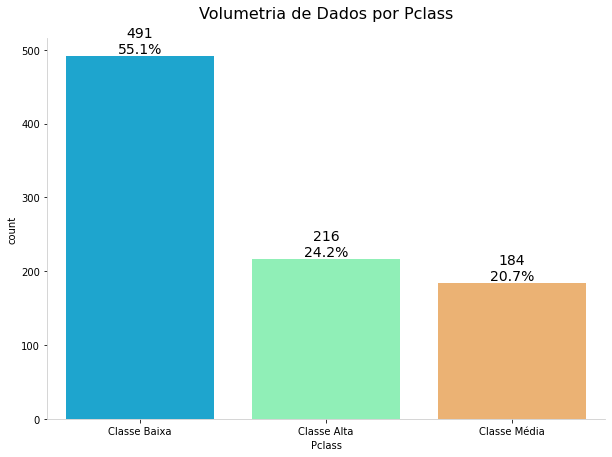

In [16]:
# Customizando rótulos
plot_countplot(df=df, col='Pclass', order=True, label_names=['Classe Baixa', 'Classe Alta', 'Classe Média'])

Com o argumento `palette`, é possível modificar a paleta de cores do gráfico:

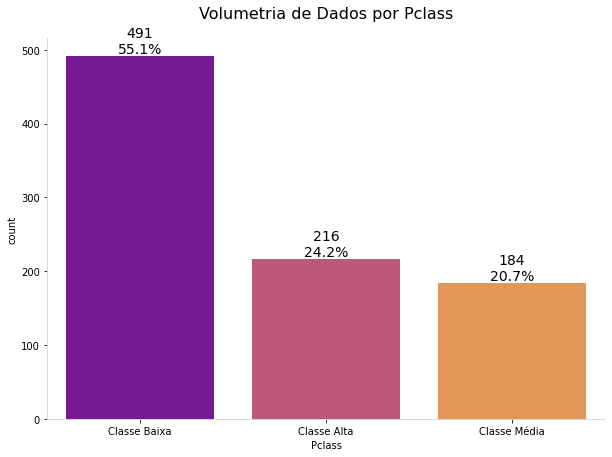

In [17]:
# Customizando cores
plot_countplot(df=df, col='Pclass', order=True, label_names=['Classe Baixa', 'Classe Alta', 'Classe Média'],
               palette='plasma')

Visando incrementar ainda mais a plotagem, o parâmetro `hue` permite adicionar uma quebra adicional na análise de volumetria. O exemplo a seguir traz uma ideia de volumetria de sobreviventes/vítimas por cada uma das classes sociais presentes.

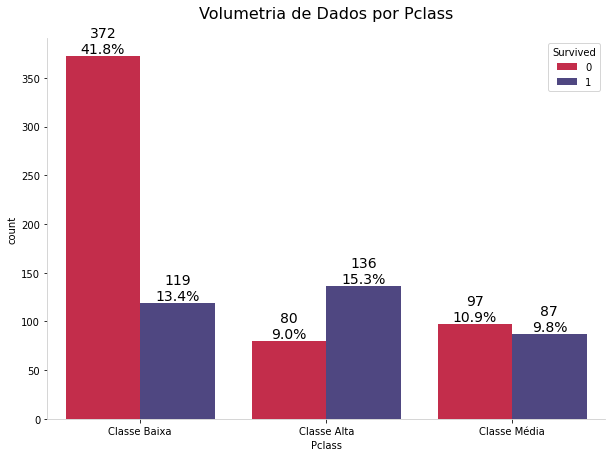

In [18]:
# Adicionando quebra adicional
plot_countplot(df=df, col='Pclass', order=True, label_names=['Classe Baixa', 'Classe Alta', 'Classe Média'],
               palette=['crimson', 'darkslateblue'], hue='Survived')

Analisando o gráfico acima, é possível extrair um insight relevante:

De todos os passageiros pertencentes a `Classe Baixa`, o volume relativo de vítimas foi extremamente superior ao volume de sobreviventes. Esse cenário é diferente para passageiros da `Classe Média`, onde o percentual de vítimas é bem próximo ao percentual de sobreviventes. Já para aqueles pertencentes a `Classe Alta`, o volume de sobreviventes superou o volume de vítimas.

Ao que tudo indica, o resgate de passageiros com melhores condições financeiras foi priorizado durante o naufrágio do navio Titanic.

___


Uma das vantagens em utilizar gráficos de barras ao invés de gráficos de rosca/pizza, é a possibilidade de visualizar um número maior de entradas sem perder poder visual. No exemplo abaixo, será investigada a presença de mais de um passageiro por cabine através da plotagem das top 10 cabines com mais entradas vinculadas.

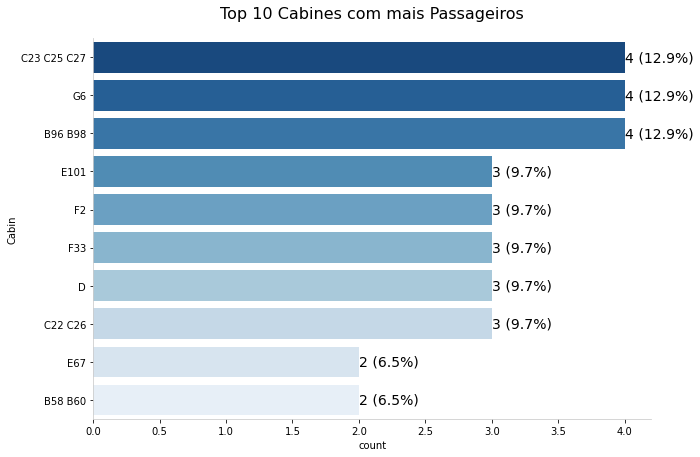

In [19]:
# Top cabines
plot_countplot(df=df, col='Cabin', top=10, order=True, orientation='vertical', palette='Blues_r',
               title='Top 10 Cabines com mais Passageiros')

## Countplot em Barras Agrupadas

No exemplo de gráfico de volumetrias de classe pela quebra de sobrevivência, foi possível retirar algumas conclusões relevantes sobre a base de dados e como a classe social afetou as chances de sobrevivências dos passageiros e tripulantes do navio Titanic.

Uma outra forma de analisar essa mesma situação é a partir de um gráfico de barras agrupadas, separando as séries pela variável que se queira observar. Nesse tipo de plotagem, as diferenças percentuais de representatividade se tornam mais claras ao usuário final, abrindo a possibilidade de conclusões mais assertivas a respeito das quebras envolvidas no contexto.

In [20]:
def plot_pct_countplot(df, col, hue, orientation='horizontal', figsize=(10, 7), **kwargs):
    """
    Função responsável por plotar um gráfico de barras de volumetrias (countplot)
    
    Parâmetros
    ----------
    :param df: base de dados utilizada na plotagem [type: pd.DataFrame]
    :param col: referência de coluna a ser plotada [type: string]
    :param hue: parâmetro hue para quebra de plotagem do método countplot [type: string, default=None]
    :param orientation: horizontal ou vertical [type: string, default='horizontal']
    :param figsize: dimensões da figura de plotagem [type: tuple, default=(10, 7)]
    :param **kwargs: parâmetros adicionais da função   
        :arg top: filtro de top categorias a serem plotadas [type: int, default=-1]
        :arg palette: paleta de cores utilizada na plotagem [type: string, default='rainbow']
        :arg title: título do gráfico [type: string, default=f'Volumetria para a variável {col}']
        :arg size_title: tamanho do título [type: int, default=16]
        :arg label_names: lista de rótulos de eixo [type: int, default=None]
        :arg save: flag indicativo de salvamento da imagem gerada [type: bool, default=None]
        :arg output_path: caminho de output da imagem a ser salva [type: string, default='output/']
        :arg img_name: nome do arquivo .png a ser gerado [type: string, default=f'{col}_donutchart.png']
    
    Retorno
    -------
    Essa função não retorna nenhum parâmetro além de uma plotagem de representatividade por grupo

    Aplicação
    ---------
    plot_countplot(df=df, col='column')
    """
    
    # Validando presença da coluna na base
    if col not in df.columns:
        print(f'Coluna {col} não presente na base')
        return
    
    # Validando presença da coluna hue na base
    if hue not in df.columns:
        print(f'Coluna {hue} não presente na base')
        return
    
    # Retornando parâmetros de filtro de colunas
    top = kwargs['top'] if 'top' in kwargs else -1
    if top > 0:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]
        
    # Retornando parâmetros de plotagem
    palette = kwargs['palette'] if 'palette' in kwargs else 'rainbow'
    kind = 'barh' if orientation == 'horizontal' else 'bar'
    title = kwargs['title'] if 'title' in kwargs else f'Representatividade de {hue} para a coluna {col}'
    size_title = kwargs['size_title'] if 'size_title' in kwargs else 16
    
    # Rótulos de medida para a plotagem
    if 'label_names' in kwargs:
        label_names = kwargs['label_names']
        if type(label_names) is dict:
            try:
                label_names = df[col].map(label_names).value_counts().index
            except Exception as e:
                print(f'Erro ao mapear o dicionário label_names na Series da coluna. Exception: {e}')
                label_names = df[col].value_counts().index
    else:
        label_names = None
    
    # Realizando quebra agrupada das colunas
    fig, ax = plt.subplots(figsize=figsize)
    col_to_hue = pd.crosstab(df[col], df[hue])
    col_to_hue.div(col_to_hue.sum(1).astype(float), axis=0).plot(kind=kind, stacked=True, ax=ax, 
                                                                 colormap=palette)
    
    # Customizando gráfico
    ax.set_title(title, size=size_title, pad=20)
    if label_names is not None:
        ax.set_yticklabels(label_names)

    # Verificando salvamento da imagem
    if 'save' in kwargs and bool(kwargs['save']):
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'{col}_{hue}_pctcountplot.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)

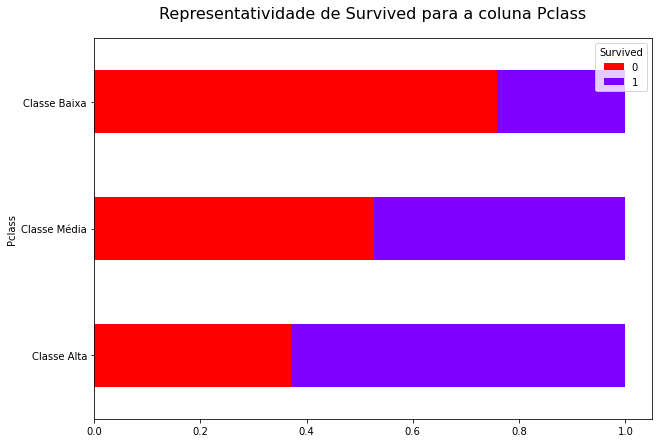

In [21]:
# Plotando gráfico de representatividade percentual
plot_pct_countplot(df=df, col='Pclass', hue='Survived', palette='rainbow_r',
                   label_names=['Classe Alta', 'Classe Média', 'Classe Baixa'])

A plotagem acima demonstra claramente o impacto da classe social na sobrevivência dos passageiros do navio. Cada série nas barras horizontais representam uma entrada diferente do argumento `col` passado na função (no exemplo, a coluna referência é `Pclass`). A legenda é guiada pelo argumento `hue` passado na função (no caso, a quebra utiliada é dada pela coluna `Survived`). 

Dessa forma, é possível analisar claramente como a `Classe Baixa` possui mais vítimas do que sobreviventes (proporção de aproximadamente 80% de vítimas contra 20% de sobrevitentes). Entre os integrantes da `Classe Alta`, percebe-se claramente o cenário inverso: tem-se aproximadamente 40% de vítimas contra 60% de sobreviventes.